## OptimESM Work Package 5: Figures

### Description:

Notebook containing plots of ocean and sea-ice diagnostics for OptimESM idealised experiments.

### Created By:

Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
# -- Import dependencies -- #
import glob
import cftime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### **UKESM1-2-LL:** NH Sea Ice

In [2]:
# -- Define filepaths -- #
ukesm1_dir = "/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/data/MOHC/siarea"
ukesm1_siconc_names = "UKESM1-2-LL_*_r1i1p1f1_siarea_*.nc"

ukesm1_siconc_paths = glob.glob(f"{ukesm1_dir}/{ukesm1_siconc_names}")
ukesm1_siconc_paths = sorted([path for path in ukesm1_siconc_paths if '-dn' not in path])
ukesm1_siconc_paths


['/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/siarea/UKESM1-2-LL_esm-hist_r1i1p1f1_siarea_1850-01-2014-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/siarea/UKESM1-2-LL_esm-piControl_r1i1p1f1_siarea_2100-01-2500-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/siarea/UKESM1-2-LL_esm-up2p0-gwl2p0_r1i1p1f1_siarea_1944-01-2444-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/siarea/UKESM1-2-LL_esm-up2p0-gwl3p0_r1i1p1f1_siarea_1992-01-2411-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/siarea/UKESM1-2-LL_esm-up2p0-gwl4p0_r1i1p1f1_siarea_2044-01-2544-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/siarea/UKESM1-2-LL_esm-up2p0_r1i1p1f1_siarea_1850-01-2139-12.nc']

In [3]:
# -- Pre-Processing esm-piControl -- #
# Open esm-piControl with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_piControl = xr.open_dataset(ukesm1_siconc_paths[1], decode_times=time_coder)

# Update time-axis using cftime:
new_time_counter = [
    cftime.Datetime360Day(t.year - 250, t.month, t.day)
    for t in ds_piControl['time_counter'].values
]
ds_piControl = ds_piControl.assign_coords(time_counter=("time_counter", new_time_counter))
ds_piControl

<xarray.Dataset> Size: 115kB
Dimensions:       (time_counter: 4812)
Coordinates:
  * time_counter  (time_counter) object 38kB 1850-01-16 00:00:00 ... 2250-12-...
    type          |S7 7B ...
Data variables:
    siarea_NH     (time_counter) float64 38kB ...
    siarea_SH     (time_counter) float64 38kB ...

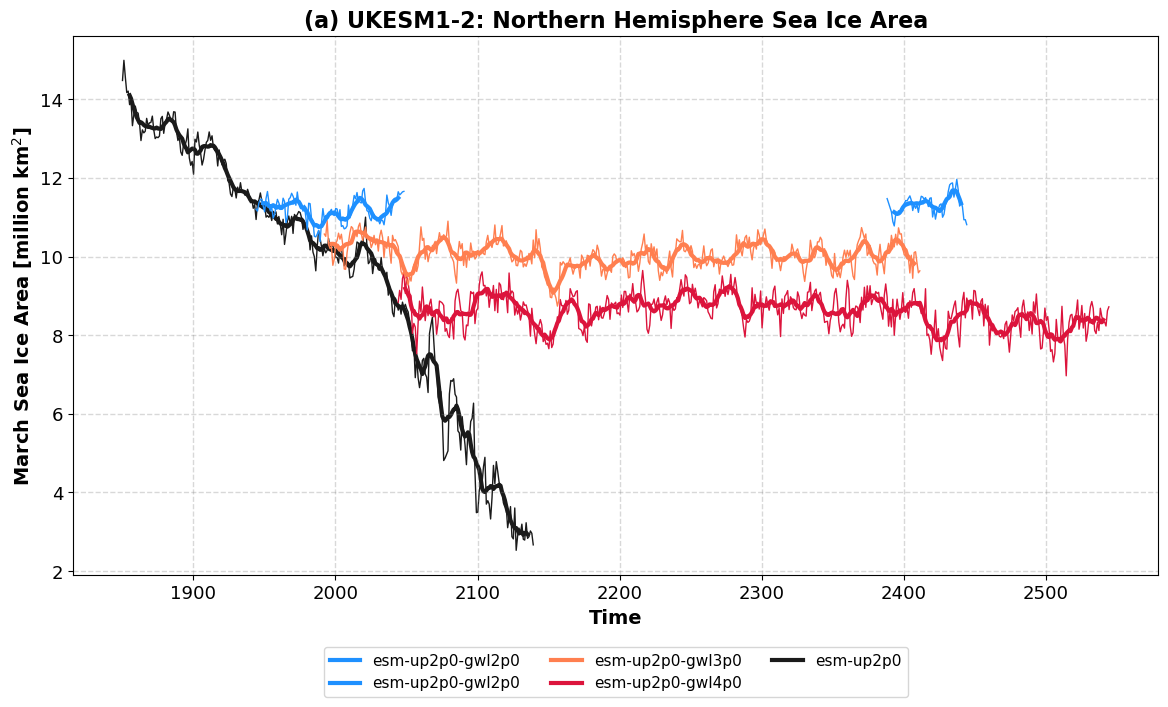

In [4]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['dodgerblue', 'coral', 'crimson', '0.1']
plot_paths = [p for p in ukesm1_siconc_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-LL_")[1].split("_r1")[0]

    # All March Monthly Means:
    if exp_name == 'esm-up2p0-gwl2p0':
        # March Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(2, 1260, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(2+1800, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )

        # 10-yr Rolling Mean:
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(2, 1260, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(2+1800, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )
    else:
        # March Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(2, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
    
        # 10-yr Rolling Mean:
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(2, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

# Configure Axes:
plt.title("(a) UKESM1-2: Northern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
# plt.ylim([-0.15, 16.25])
plt.ylabel("March Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_NH_Mar_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


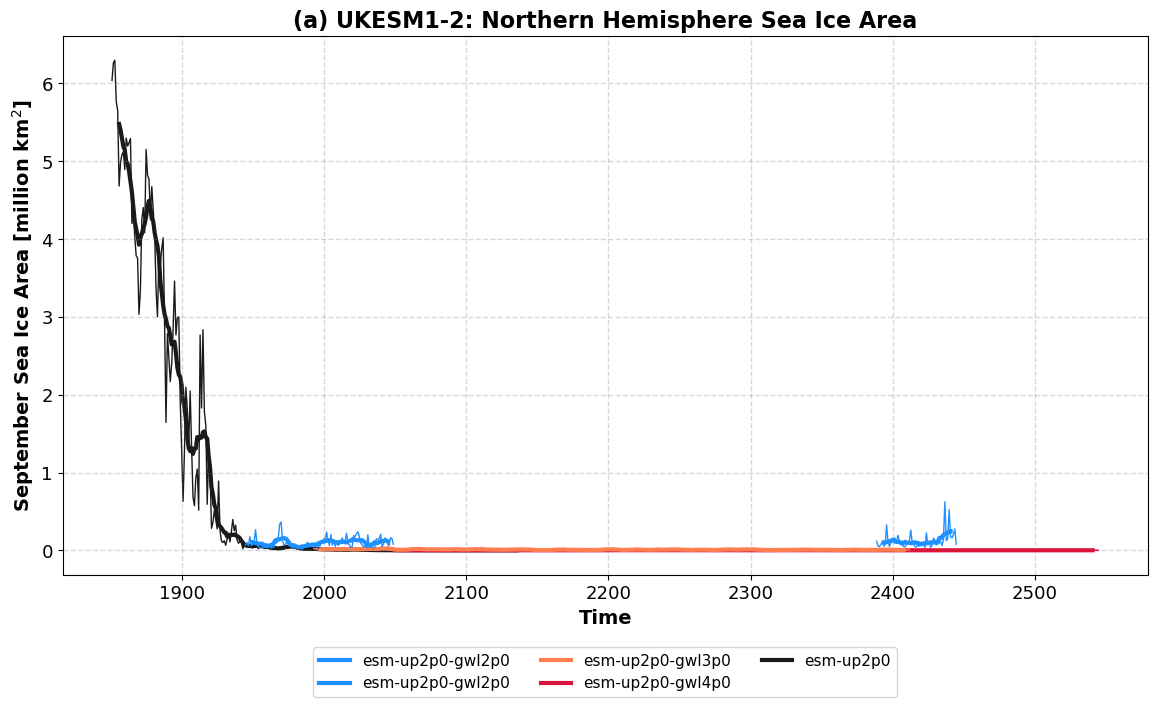

In [5]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['dodgerblue', 'coral', 'crimson', '0.1']
plot_paths = [p for p in ukesm1_siconc_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-LL_")[1].split("_r1")[0]

    # All September Monthly Means:
    if exp_name == 'esm-up2p0-gwl2p0':
        # March Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(8, 1260, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(8+1800, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )

        # 10-yr Rolling Mean:
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(8, 1260, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(8+1800, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )
    else:
        # September Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(8, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
    
        # 10-yr Rolling Mean:
        ((ds_plot['siarea_NH'] / 1E12)
         .isel(time_counter=slice(8, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

# Configure Axes:
plt.title("(a) UKESM1-2: Northern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("September Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_NH_Sep_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)

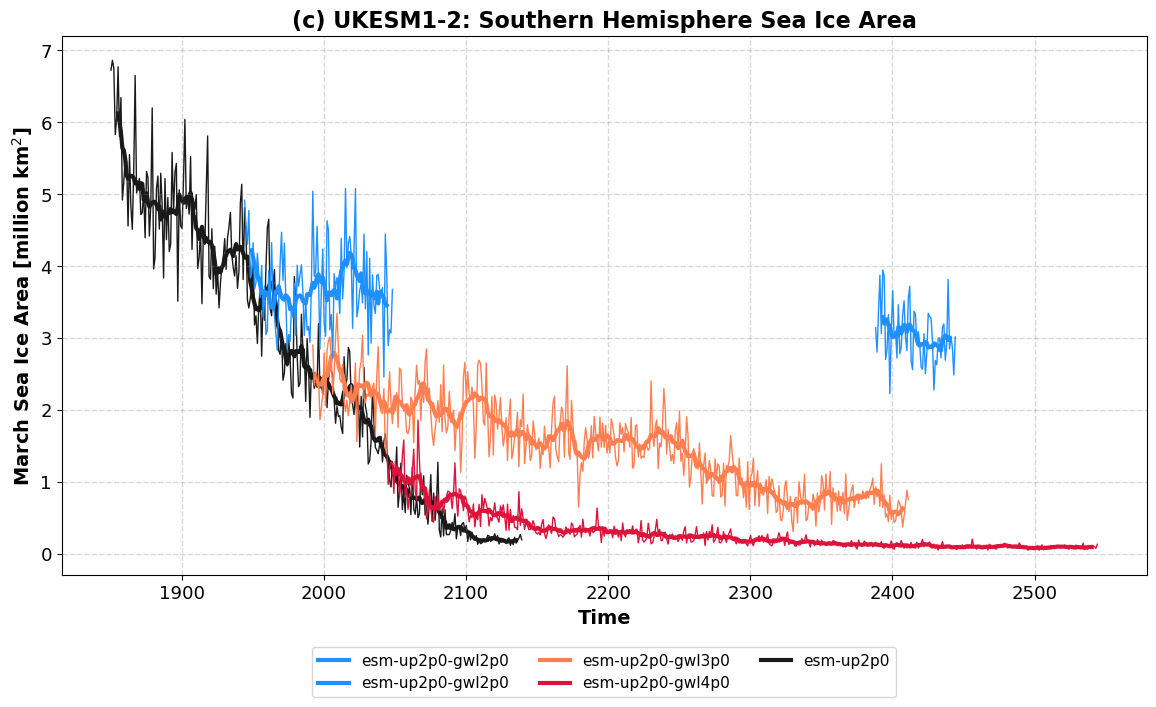

In [6]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['dodgerblue', 'coral', 'crimson', '0.1']
plot_paths = [p for p in ukesm1_siconc_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-LL_")[1].split("_r1")[0]

    # All March Monthly Means:
    if exp_name == 'esm-up2p0-gwl2p0':
        # March Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(2, 1260, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(2+1800, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )

        # 10-yr Rolling Mean:
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(2, 1260, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(2+1800, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )
    else:
        # March Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(2, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
    
        # 10-yr Rolling Mean:
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(2, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

# Configure Axes:
plt.title("(c) UKESM1-2: Southern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
# plt.ylim([-0.15, 16.25])
plt.ylabel("March Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_SH_Mar_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


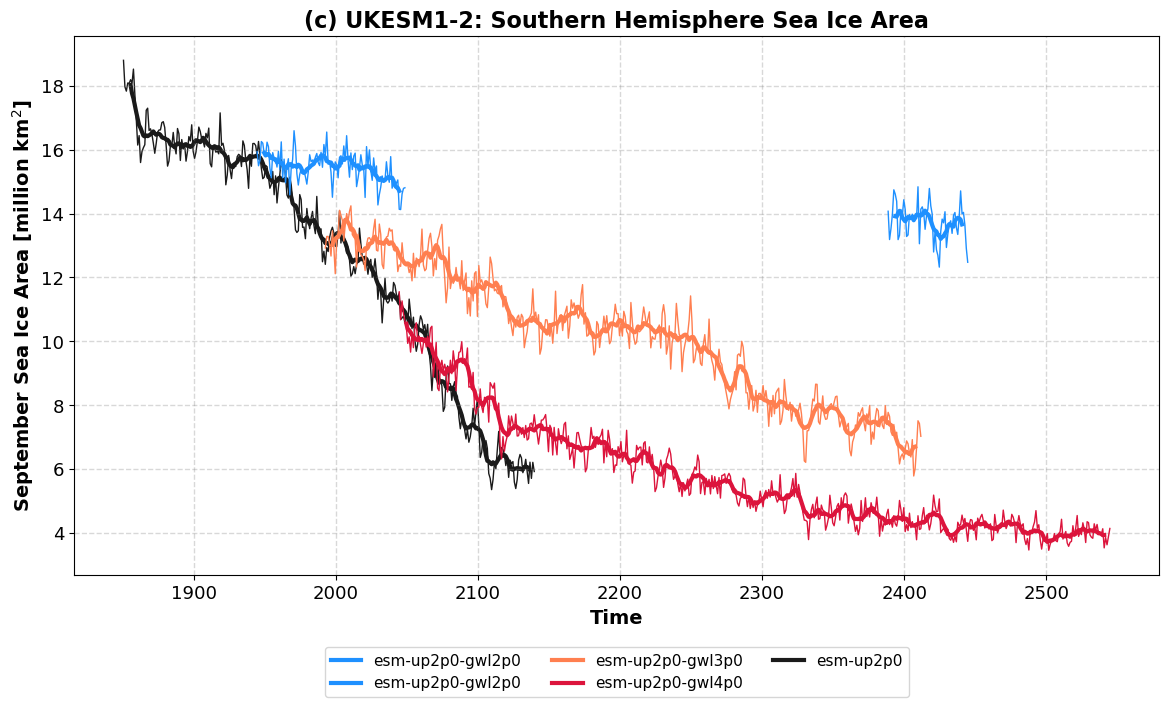

In [7]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['dodgerblue', 'coral', 'crimson', '0.1']
plot_paths = [p for p in ukesm1_siconc_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-LL_")[1].split("_r1")[0]

    # All March Monthly Means:
    if exp_name == 'esm-up2p0-gwl2p0':
        # March Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(8, 1260, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(8+1800, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )

        # 10-yr Rolling Mean:
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(8, 1260, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(8+1800, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )
    else:
        # March Means:
        ds_plot = xr.open_dataset(pp, decode_times=time_coder)
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(8, None, 12))
         .plot(lw=1, zorder=4-n, color=colors[n])
        )
    
        # 10-yr Rolling Mean:
        ((ds_plot['siarea_SH'] / 1E12)
         .isel(time_counter=slice(8, None, 12))
         .rolling(time_counter=10, center=True).mean()
         .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
        )

# Configure Axes:
plt.title("(c) UKESM1-2: Southern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
# plt.ylim([-0.15, 16.25])
plt.ylabel("September Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_SH_Sep_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)

### **UKESM1-2-LL:** Mixed Layer Volume

In [ ]:
# -- Define filepaths -- #
ukesm1_dir = "/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/data/MOHC/mlotst"
ukesm1_mlotst_names = "UKESM1-2-LL_*_r1i1p1f1_mlotst_*.nc"

ukesm1_mlotst_paths = glob.glob(f"{ukesm1_dir}/{ukesm1_mlotst_names}")
ukesm1_mlotst_paths = sorted([path for path in ukesm1_mlotst_paths if '-dn' not in path])
ukesm1_mlotst_paths


In [ ]:
# -- Pre-Processing esm-piControl -- #
# Open esm-piControl with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_piControl = xr.open_dataset(ukesm1_mlotst_paths[2], decode_times=time_coder)

# Update time-axis using cftime:
new_time_counter = [
    cftime.Datetime360Day(t.year - 250, t.month, t.day)
    for t in ds_piControl['time_counter'].values
]
ds_piControl = ds_piControl.assign_coords(time_counter=("time_counter", new_time_counter))

In [ ]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['dodgerblue', 'coral', 'crimson', '0.1']
plot_paths = [p for p in ukesm1_mlotst_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-LL_")[1].split("_r1")[0]

    # All March Monthly Means:
    ds_plot = xr.open_dataset(pp, decode_times=time_coder)
    (ds_plot['mlotst_vol_SPNA']
     .isel(time_counter=slice(2, None, 12))
     .plot(lw=1, color=colors[n], zorder=4-n, alpha=0.3)
    )

    # 10-yr Rolling Mean:
    (ds_plot['mlotst_vol_SPNA']
     .isel(time_counter=slice(2, None, 12))
     .rolling(time_counter=10, center=True).mean()
     .plot(lw=3, color=colors[n], label=exp_name, zorder=4-n)
    )

# Configure Axes:
plt.title("(a) UKESM1-2: Subpolar North Atlantic Mixed Layer Volume", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylim([0.2E15, 1.85E15])
plt.ylabel("March Mixed Layer Volume [m$^{3}$]", fontdict={'size': 14, 'weight': 'bold'})
# plt.legend(ncols=2, fontsize=13)

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_SPNA_mlotst_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


### **EC-Earth3-ESM1:** Mixed Layer Volume

In [ ]:
# -- Define filepaths -- #
ecearth_dir = "/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/data/SMHI/mlotst"
ecearth_siconc_names = "EC-Earth3-ESM-1_*_r1i1p1f1_mlotst_*.nc"

ecearth_mlotst_paths = glob.glob(f"{ecearth_dir}/{ecearth_siconc_names}")
ecearth_mlotst_paths = sorted([path for path in ecearth_mlotst_paths if '-dn' not in path])
ecearth_mlotst_paths


In [ ]:
# -- Pre-Processing esm-piControl -- #
# Open esm-piControl with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_piControl = xr.open_dataset(ecearth_mlotst_paths[6], decode_times=time_coder)

In [ ]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['0.5', 'dodgerblue', 'coral', 'crimson', 'pink', 'purple', '0.1']
plot_paths = [p for p in ecearth_mlotst_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-1_")[1].split("_r1")[0]

    # All March Monthly Means:
    ds_plot = xr.open_dataset(pp, decode_times=time_coder)
    (ds_plot['mlotst_vol_SPNA']
     .isel(time_counter=slice(2, None, 12))
     .plot(lw=1, color=colors[n], zorder=4-n, alpha=0.3)
    )

    # 10-yr Rolling Mean:
    (ds_plot['mlotst_vol_SPNA']
     .isel(time_counter=slice(2, None, 12))
     .rolling(time_counter=10, center=True).mean()
     .plot(lw=3, color=colors[n], label=exp_name, zorder=4-n)
    )

# Configure Axes:
plt.title("(b) EC-Earth3-ESM-1: Subpolar North Atlantic Mixed Layer Volume", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylim([0.2E15, 1.85E15])
plt.ylabel("March Mixed Layer Volume [m$^{3}$]", fontdict={'size': 14, 'weight': 'bold'})
# plt.legend(ncols=3, fontsize=13)

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM-1_SPNA_mlotst_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)

### EC-Earth3-ESM-1: Subpolar North Atlantic Mask

In [ ]:
plt.figure(figsize=(9, 7))
ds_piControl.mask_SPNA.plot(xlim=[220, 290], ylim=[200, 270])

# Configure Axes:
plt.title("EC-Earth3-ESM-1: Subpolar North Atlantic", fontdict={'size': 12, 'weight': 'bold'})
plt.xlabel("i", fontdict={'size': 14, 'weight': 'bold'})
plt.xticks(fontsize=13)
plt.ylabel("j", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM-1_SPNA_mask.png", bbox_inches='tight', dpi=600)

### **EC-Earth3-ESM-1:** NH Sea Ice

In [8]:
# -- Define filepaths -- #
ecearth_dir = "/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/data/SMHI/siarea"
ecearth_siarea_names = "EC-Earth3-ESM-1_*_r1i1p1f1_siarea_*.nc"

ecearth_siarea_paths = glob.glob(f"{ecearth_dir}/{ecearth_siarea_names}")
ecearth_siarea_paths = sorted([path for path in ecearth_siarea_paths if '-dn' not in path])
ecearth_siarea_paths


['/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-hist_r1i1p1f1_siarea_1850-01-2014-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-piControl_r1i1p1f1_siarea_1850-01-2450-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-up2p0-gwl1p5_r1i1p1f1_siarea_1926-01-2225-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-up2p0-gwl2p0_r1i1p1f1_siarea_1951-01-2450-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-up2p0-gwl3p0_r1i1p1f1_siarea_2001-01-2300-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-up2p0-gwl4p0_r1i1p1f1_siarea_2051-01-2550-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-up2p0-gwl5p0_r1i1p1f1_siarea_2101-01-2400-12.nc',
 '/g100_wo

In [9]:
# -- Pre-Processing esm-piControl -- #
# Open esm-piControl with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_piControl = xr.open_dataset(ecearth_siarea_paths[2], decode_times=time_coder)

ds_piControl

<xarray.Dataset> Size: 86kB
Dimensions:       (time_counter: 3600)
Coordinates:
  * time_counter  (time_counter) datetime64[s] 29kB 1926-01-16T12:00:00 ... 2...
    type          |S7 7B ...
Data variables:
    siarea_NH     (time_counter) float64 29kB ...
    siarea_SH     (time_counter) float64 29kB ...

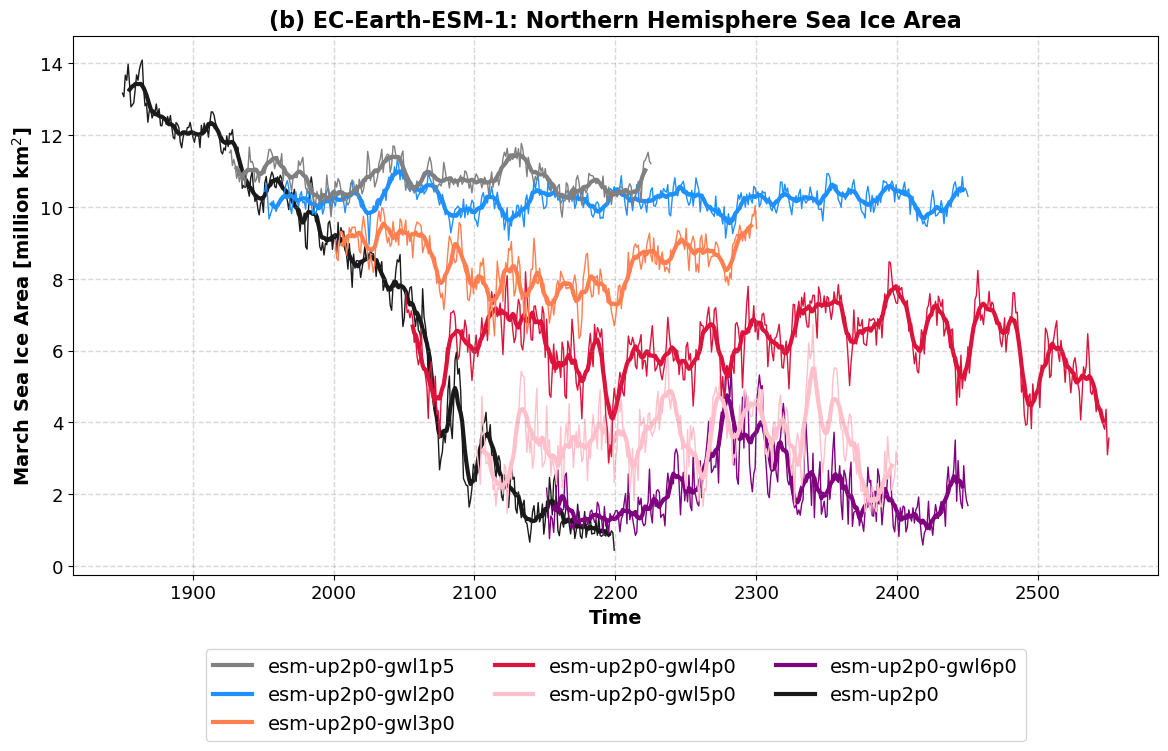

In [10]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['0.5', 'dodgerblue', 'coral', 'crimson', 'pink', 'purple', '0.1']
plot_paths = [p for p in ecearth_siarea_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-1_")[1].split("_r1")[0]

    # All March Monthly Means:
    ds_plot = xr.open_dataset(pp, decode_times=time_coder)
    ((ds_plot['siarea_NH'] / 1E12)
     .isel(time_counter=slice(2, None, 12))
     .plot(lw=1, zorder=4-n, color=colors[n])
    )

    # 10-yr Rolling Mean:
    ((ds_plot['siarea_NH'] / 1E12)
     .isel(time_counter=slice(2, None, 12))
     .rolling(time_counter=10, center=True).mean()
     .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
    )

# Configure Axes:
plt.title("(b) EC-Earth-ESM-1: Northern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("March Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM-1_NH_Mar_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)

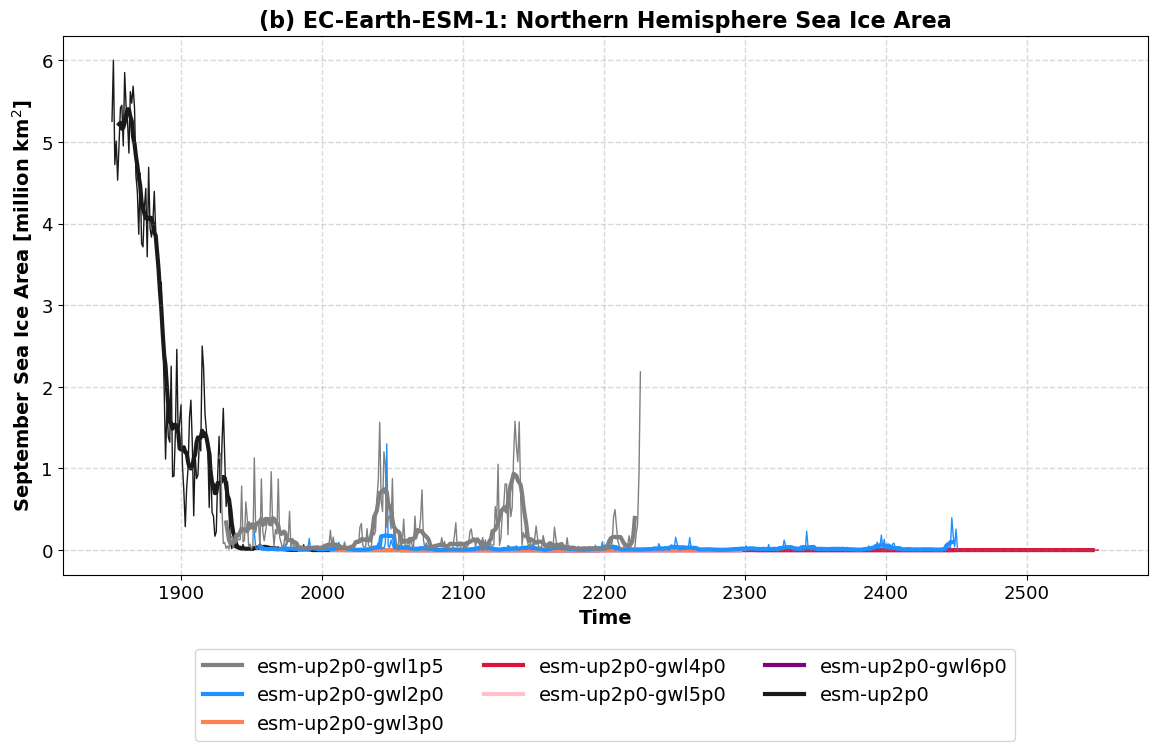

In [12]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['0.5', 'dodgerblue', 'coral', 'crimson', 'pink', 'purple', '0.1']
plot_paths = [p for p in ecearth_siarea_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-1_")[1].split("_r1")[0]

    # All September Monthly Means:
    ds_plot = xr.open_dataset(pp, decode_times=time_coder)
    ((ds_plot['siarea_NH'] / 1E12)
     .isel(time_counter=slice(8, None, 12))
     .plot(lw=1, zorder=4-n, color=colors[n])
    )

    # 10-yr Rolling Mean:
    ((ds_plot['siarea_NH'] / 1E12)
     .isel(time_counter=slice(8, None, 12))
     .rolling(time_counter=10, center=True).mean()
     .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
    )

# Configure Axes:
plt.title("(b) EC-Earth-ESM-1: Northern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("September Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM-1_NH_Sep_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


### **EC-Earth3-ESM-1:** SH Sea Ice

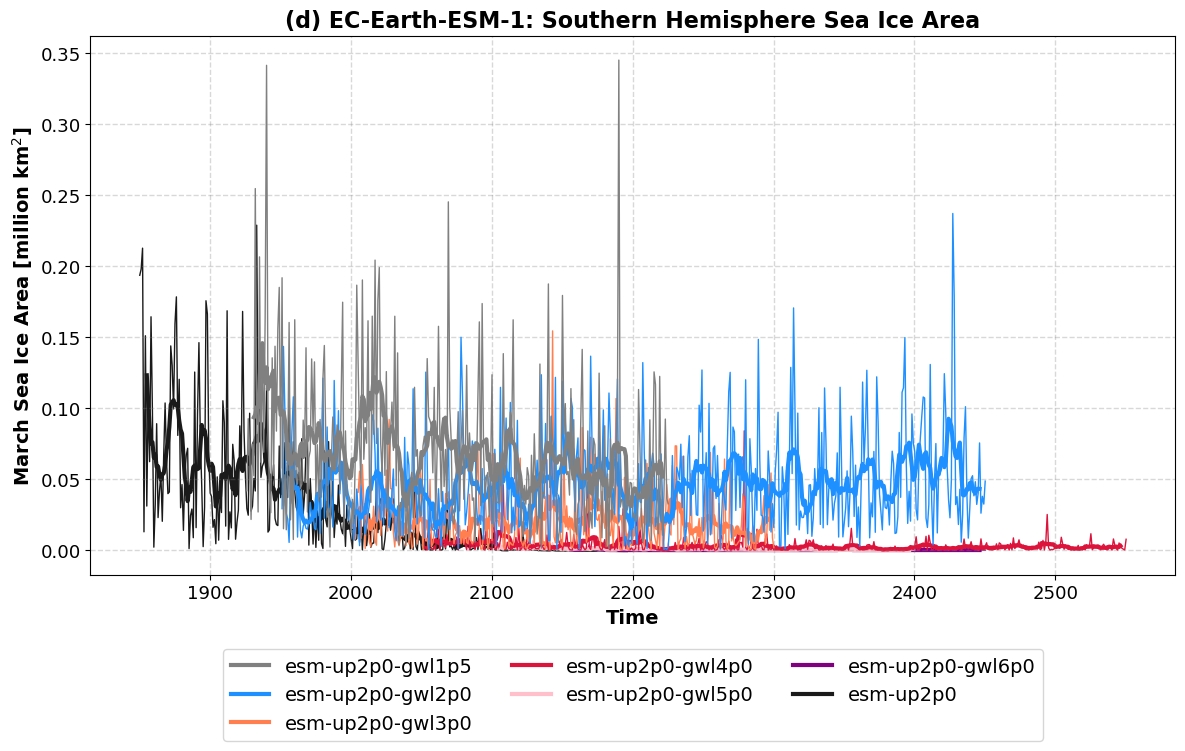

In [13]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['0.5', 'dodgerblue', 'coral', 'crimson', 'pink', 'purple', '0.1']
plot_paths = [p for p in ecearth_siarea_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-1_")[1].split("_r1")[0]

    # All March Monthly Means:
    ds_plot = xr.open_dataset(pp, decode_times=time_coder)
    ((ds_plot['siarea_SH'] / 1E12)
     .isel(time_counter=slice(2, None, 12))
     .plot(lw=1, zorder=4-n, color=colors[n])
    )

    # 10-yr Rolling Mean:
    ((ds_plot['siarea_SH'] / 1E12)
     .isel(time_counter=slice(2, None, 12))
     .rolling(time_counter=10, center=True).mean()
     .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
    )

# Configure Axes:
plt.title("(d) EC-Earth-ESM-1: Southern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("March Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM-1_SH_Mar_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)

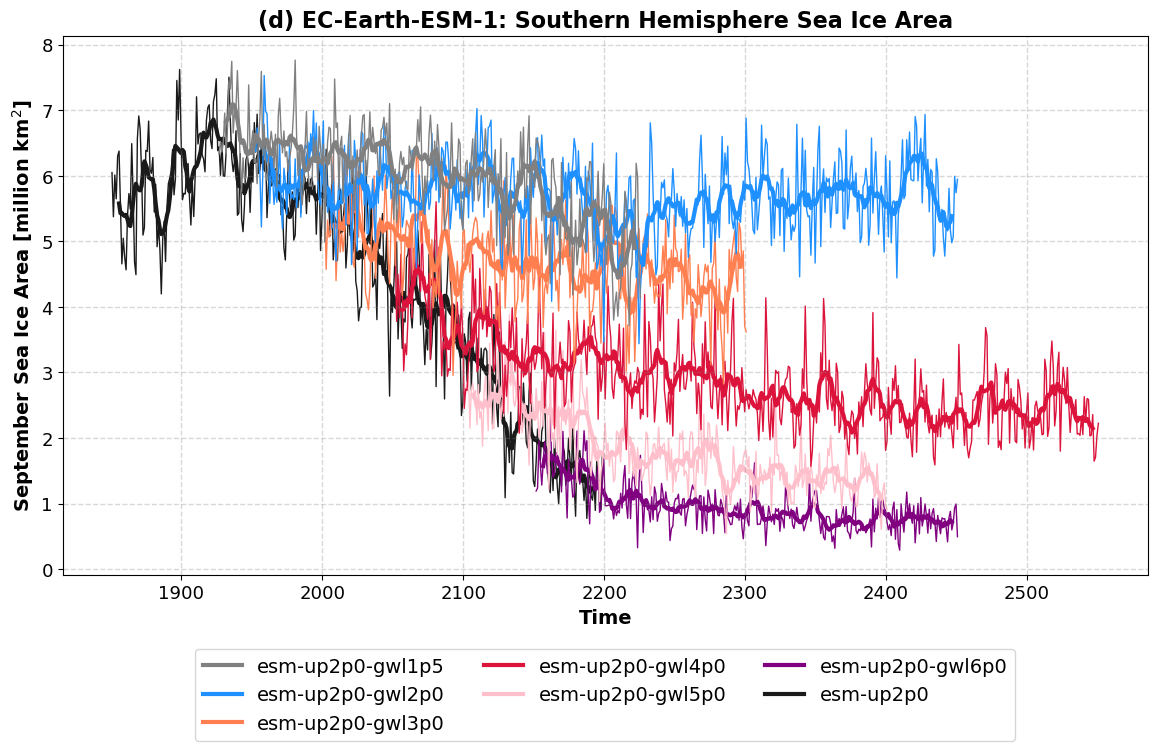

In [14]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plotting ML Volume in the SPG:
colors = ['0.5', 'dodgerblue', 'coral', 'crimson', 'pink', 'purple', '0.1']
plot_paths = [p for p in ecearth_siarea_paths if ('piControl' not in p) & ('hist' not in p)]
for n, pp in enumerate(plot_paths):
    exp_name = pp.split("-1_")[1].split("_r1")[0]

    # All September Monthly Means:
    ds_plot = xr.open_dataset(pp, decode_times=time_coder)
    ((ds_plot['siarea_SH'] / 1E12)
     .isel(time_counter=slice(8, None, 12))
     .plot(lw=1, zorder=4-n, color=colors[n])
    )

    # 10-yr Rolling Mean:
    ((ds_plot['siarea_SH'] / 1E12)
     .isel(time_counter=slice(8, None, 12))
     .rolling(time_counter=10, center=True).mean()
     .plot(lw=3, label=exp_name, zorder=4-n, color=colors[n])
    )

# Configure Axes:
plt.title("(d) EC-Earth-ESM-1: Southern Hemisphere Sea Ice Area", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("September Sea Ice Area [million km$^{2}$]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM-1_SH_Sep_siarea_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)

In [35]:
nemo_dir = "/g100_store/DRES_OptimESM/ESGF/prepub/smhi/CMIP6Plus/TIPMIP/EC-Earth-Consortium/EC-Earth3-ESM-1/esm-up2p0/r1i1p1f1/SImon"
domain_filepath = "/g100/home/userexternal/otooth00/OptimESM/data/CINECA/SMHI/EC-Earth_Ofx/domain_cfg_Ofx_EC-Earth.nc"
areacello_filepath = "/g100_store/DRES_OptimESM/ESGF/prepub/smhi/CMIP6Plus/CMIP/EC-Earth-Consortium/EC-Earth3-ESM-1/esm-piControl/r1i1p1f1/OPfx/areacello/gn/v20240622/areacello_OPfx_EC-Earth3-ESM-1_esm-piControl_r1i1p1f1_gn.nc"
ds_domain = xr.open_dataset(domain_filepath).rename({"x": "i", "y": "j"})
ds_areacello = xr.open_dataset(areacello_filepath).squeeze()

icemod_filepath = f"{nemo_dir}/siconc/gn/v*/siconc_SImon_EC-Earth3-ESM-1_esm-up2p0_r1i1p1f1_gn_*.nc"
ds_si = xr.open_mfdataset(glob.glob(icemod_filepath), preprocess=lambda ds: ds[['siconc']])

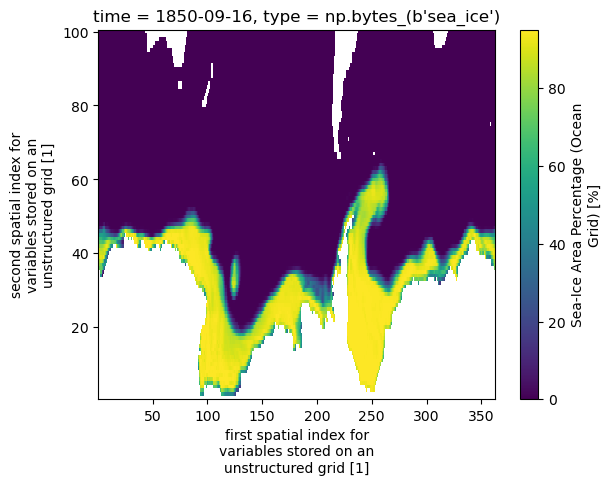

In [30]:
ds_si.siconc[8, :100, :].plot()

In [34]:
areacello = (ds_domain['e1t'] * ds_domain['e2t']).squeeze()

(areacello * (ds_si.siconc[8, :, :] / 100))[:100, :].sum().values

array(5.92117991e+12)

In [37]:
(ds_areacello.areacello * (ds_si.siconc[8, :, :] / 100))[:100, :].sum().values

array(5.9211797e+12, dtype=float32)

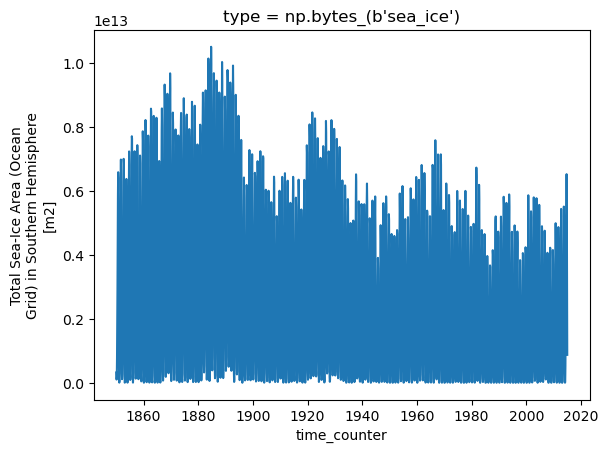

In [38]:
ds_test = xr.open_dataset('/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/data/SMHI/siarea/EC-Earth3-ESM-1_esm-hist_r1i1p1f1_siarea_1850-01-2014-12.nc')

ds_test.siarea_SH.plot()
                          